# Titanic survival project!!! 🚀

### Problem : 
To predict the whether the passenger will survive or not by building various classification models.

### Data :
The dataset can be found here :
https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

### Modelling :
We will be using different classification models like random forest classifier, logistic regression and also perform hyperparameter tuning if required to improve the score of the model.

### Evaluation:
The evaluation metrics we will use are accuracy, f1 score, precision, recall, confusion matrix.

### Required tools :

In [236]:
#import all the plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import the modelling libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#import the evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay

#hyperparamter tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [128]:
#load the dataset
data = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\Titanic-Dataset.csv", index_col=0)

In [129]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
#check info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [131]:
#check shape
data.shape

(891, 11)

In [132]:
#summary statistics
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA (Exploratory Data Analysis)

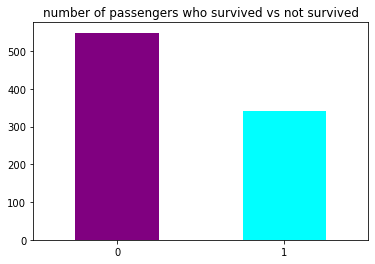

In [133]:
#visualize the target variable
colors = ["purple","cyan"]
data["Survived"].value_counts().plot(kind = "bar", color = colors)
plt.title("number of passengers who survived vs not survived")
plt.xticks(rotation = 1)
plt.show()

### 0 - Not survived, 1- Survived.

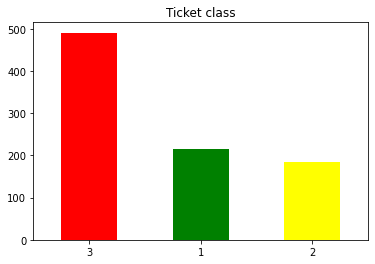

In [134]:
#visualizing the ticket class (pclass)
colors = ["red","green","yellow"]
data["Pclass"].value_counts().plot(kind = "bar", color = colors)
plt.title("Ticket class")
plt.xticks(rotation = 1)
plt.show()

### Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd

In [135]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


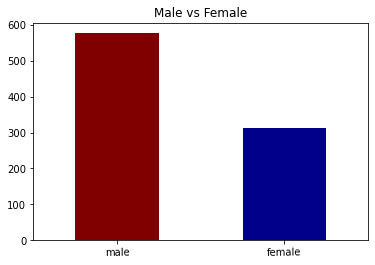

In [136]:
#number of male and female present
colors =["maroon","darkblue"]
data["Sex"].value_counts().plot(kind = "bar", color = colors)
plt.title("Male vs Female")
plt.xticks(rotation = 1)
plt.show()

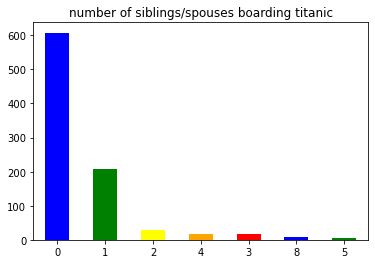

In [137]:
#number of siblings/spouses aboard the titanic
colors =["blue","green","yellow","orange","red"]
data["SibSp"].value_counts().plot(kind = "bar", color = colors)
plt.title("number of siblings/spouses boarding titanic")
plt.xticks(rotation = 1)
plt.show()

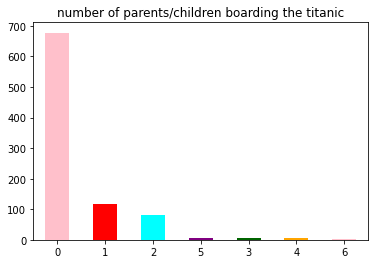

In [138]:
#number of parents/children aboard the titanic
colors = ["pink","red","cyan","purple","darkgreen","orange"]
data["Parch"].value_counts().plot(kind = "bar", color = colors)
plt.title("number of parents/children boarding the titanic")
plt.xticks(rotation = 1)
plt.show()

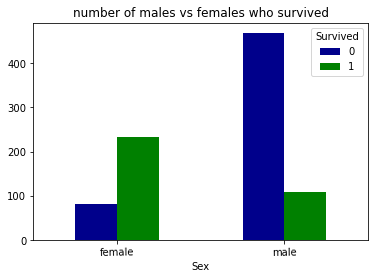

In [139]:
#comparision of the gender and the target variable
colors = ["darkblue","green"]
pd.crosstab(data["Sex"], data["Survived"]).plot(kind = "bar", color = colors)
plt.title("number of males vs females who survived")
plt.xticks(rotation = 1)
plt.show()

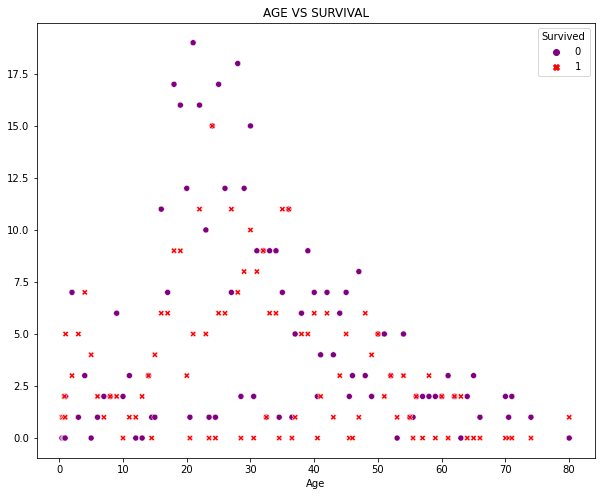

In [140]:
#comparision of the age and the target column
colors =["purple","red"]
plt.figure(figsize = (10,8))
sns.scatterplot(data=pd.crosstab(data["Age"],data["Survived"]), palette=colors)
plt.title("AGE VS SURVIVAL")
plt.show()

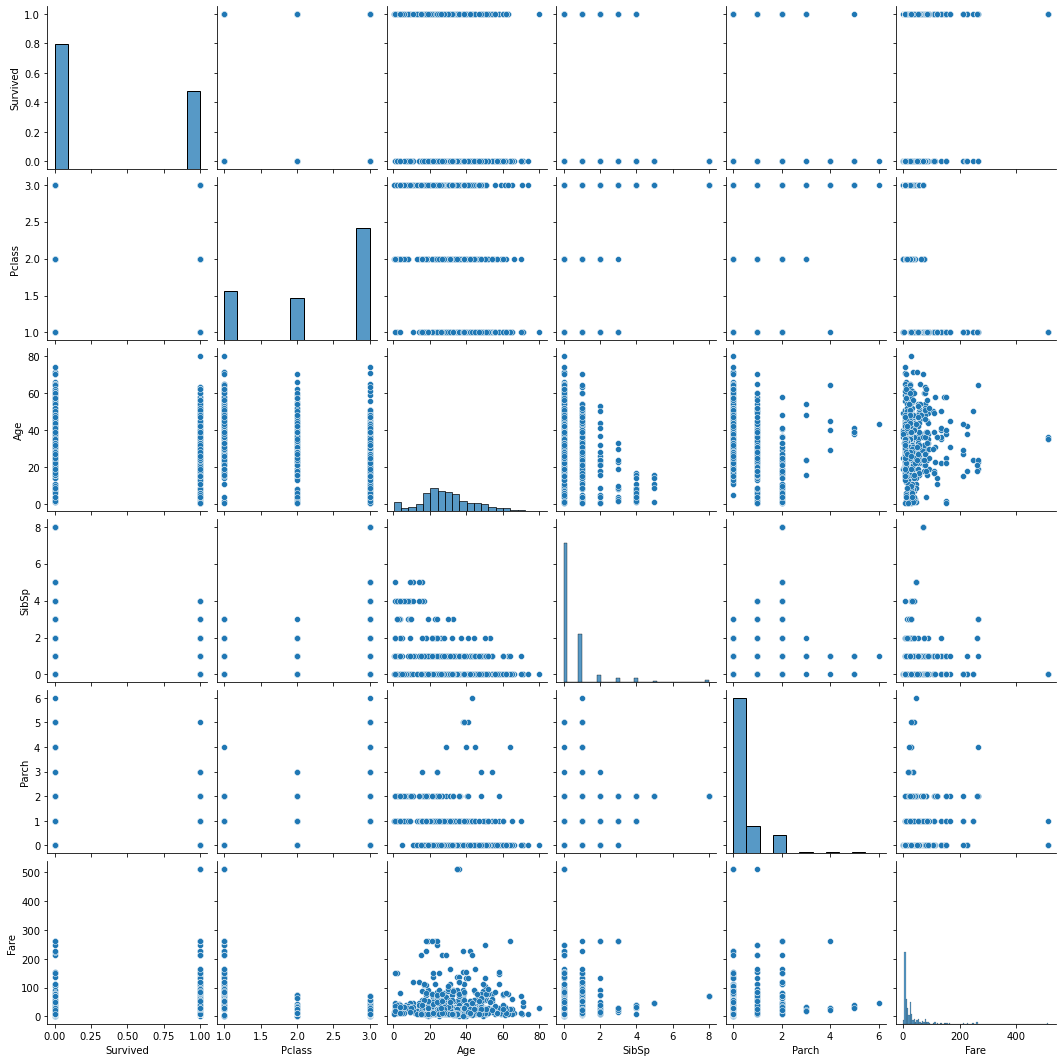

In [141]:
sns.pairplot(data= data);

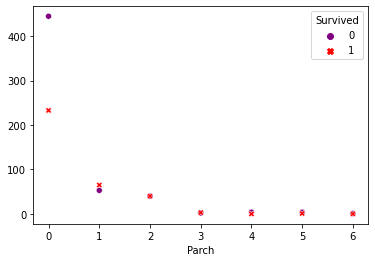

In [142]:
#histogram of the parch and target column
sns.scatterplot(data= pd.crosstab(data["Parch"],data["Survived"]),palette=colors);

In [143]:
#check for null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [144]:
#drop the null values age
data.dropna(subset=["Age"], inplace=True)

In [146]:
data["Embarked"].mode()

0    S
dtype: object

In [147]:
#fill the embarked column with the mode
data["Embarked"] = data["Embarked"].fillna("S")

In [148]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      0
dtype: int64

In [149]:
#drop the columns which are not required
data = data.drop(["Name","Cabin","Ticket"], axis =1)

In [150]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [151]:
#convert the non numeric columns into numeric ones
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Sex','Embarked']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,3,0,39.0,0,5,29.1250,1
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2


In [153]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

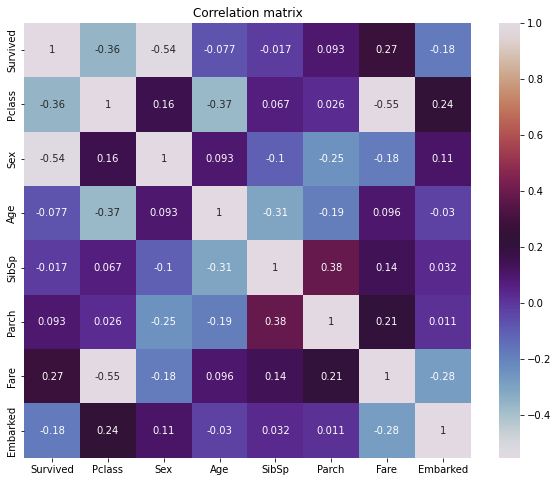

In [173]:
#correlation matrix
corr = data.corr()
plt.figure(figsize =(10,8))
sns.heatmap(data=corr, cmap="twilight", annot=True)
plt.title("Correlation matrix")
plt.show()

### Modelling 

In [156]:
#split the data into feature and target columns
x = data.drop("Survived", axis =1)
y = data["Survived"]

In [159]:
len(x), len(y)

(714, 714)

### Random forest classifier

In [163]:
#split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#instantiate the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

#fit the clf to the train data
clf.fit(x_train,y_train)

#score on the test set
clf.score(x_test,y_test)

0.7972027972027972

In [164]:
#predictions
y_preds = clf.predict(x_test)

In [212]:
#evaluations
print(f"The accuracy score is: {accuracy_score(y_test,y_preds)}")
print(f"The precision score is: {precision_score(y_test,y_preds)}")
print(f"The recall score is: {recall_score(y_test,y_preds)}")
print(f"The f1 score is: {f1_score(y_test,y_preds)}")

The accuracy score is: 0.7972027972027972
The precision score is: 0.7755102040816326
The recall score is: 0.6785714285714286
The f1 score is: 0.7238095238095238


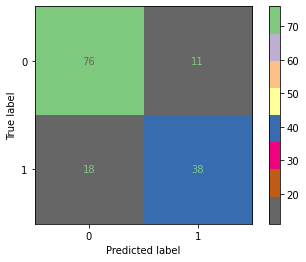

In [213]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x_test, y=y_test,cmap="Accent_r");

### Although the model performed quite well, the scores can still be improved by hyperparameter tuning

In [237]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)  # Assuming you have x_train and y_train

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_accuracy = best_rf_model.score(x_test, y_test)  # Assuming you have X_test and y_test
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.8041958041958042


In [238]:
best_rf_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [239]:
#predictions
ideal_preds = best_rf_model.predict(x_test)

In [240]:
#evaluations
print(f"The accuracy score is: {accuracy_score(y_test,ideal_preds)}")
print(f"The precision score is: {precision_score(y_test,ideal_preds)}")
print(f"The recall score is: {recall_score(y_test,ideal_preds)}")
print(f"The f1 score is: {f1_score(y_test,ideal_preds)}")

The accuracy score is: 0.8041958041958042
The precision score is: 0.7692307692307693
The recall score is: 0.7142857142857143
The f1 score is: 0.7407407407407407


### Observations :
These improvements indicate that the hyperparameter tuning process was successful in enhancing the model's overall performance. The accuracy, precision, recall, and F1 score have all shown noticeable enhancements, suggesting a more effective model in terms of both correctness and balance between precision and recall.

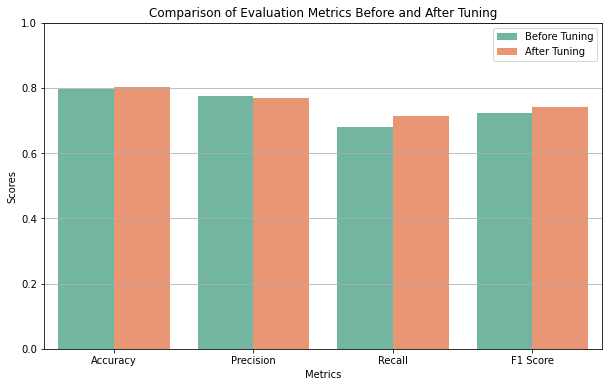

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Scores before tuning
scores_before = [0.7972, 0.7755, 0.6786, 0.7238]

# Scores after tuning
scores_after = [0.8042, 0.7692, 0.7143, 0.7407]

# Create a dataframe for easier plotting
data = {'Metrics': metrics * 2,
        'Scores': scores_before + scores_after,
        'Tuning': ['Before Tuning'] * len(metrics) + ['After Tuning'] * len(metrics)}

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metrics', y='Scores', hue='Tuning', data=data, palette='Set2')

plt.title('Comparison of Evaluation Metrics Before and After Tuning')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Setting y-axis limits to better visualize differences
plt.grid(axis='y')
plt.legend(loc='upper right')

plt.show()


### Logistic regression

In [248]:
#instantiate the reg
lr = LogisticRegression(max_iter=100, n_jobs=-1, random_state=42)

#fit the model to the train data
lr.fit(x_train,y_train)

#score on the test data
lr.score(x_test,y_test)

0.7412587412587412

In [249]:
#predictions
lr_preds = lr.predict(x_test)

In [254]:
#evaluations
print(f"The accuracy score is: {accuracy_score(y_test,lr_preds)}")
print(f"The precision score is: {precision_score(y_test,lr_preds)}")
print(f"The recall score is: {recall_score(y_test,lr_preds)}")
print(f"The f1 score is: {f1_score(y_test,lr_preds)}")

The accuracy score is: 0.7412587412587412
The precision score is: 0.6862745098039216
The recall score is: 0.625
The f1 score is: 0.6542056074766355


### Let's try to improve these scores by hyperparameter tuning

In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Create a Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)  

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_log_reg_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_accuracy = best_log_reg_model.score(x_test, y_test) 
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.7412587412587412


In [258]:
#predictions
lr_ideal_preds = best_log_reg_model.predict(x_test)

In [259]:
#evaluations
print(f"The accuracy score is: {accuracy_score(y_test,lr_ideal_preds)}")
print(f"The precision score is: {precision_score(y_test,lr_ideal_preds)}")
print(f"The recall score is: {recall_score(y_test,lr_ideal_preds)}")
print(f"The f1 score is: {f1_score(y_test,lr_ideal_preds)}")

The accuracy score is: 0.7412587412587412
The precision score is: 0.6862745098039216
The recall score is: 0.625
The f1 score is: 0.6542056074766355


### observations :
Overall, while tuning hyperparameters can often lead to improvements in model performance, it's not guaranteed in all cases. In this scenario, the logistic regression model's performance remained unchanged after tuning.

### So, in conclusion  the random forest classifier model after hyperparamter tuning performed the best comparitively.